In [28]:
import pandas as pd
import numpy as np
import random

In [29]:
data = [] 

for _ in range(500): 
    team_name = f"Team {chr(random.randint(65, 90))}" 
    season = random.randint(2010, 2022) 
    wins = random.randint(50, 110) 
    losses = 162 - wins 
    hits = random.randint(1200, 1600) 
    doubles = random.randint(200, 350) 
    triples = random.randint(10, 40) 
    home_runs = random.randint(100, 250) 
    strikeouts = random.randint(1000, 1500) 
    
    # Apply adjustments to create correlations 
    hits_adjusted = hits + (wins - 80) * 5 
    doubles_adjusted = doubles + (wins - 80) * 2 
    triples_adjusted = triples + (wins - 80) 
    home_runs_adjusted = home_runs + (wins - 80) * 3 
    strikeouts_adjusted = strikeouts - (wins - 80) * 10 
    data.append([team_name, season, wins, losses, hits_adjusted, doubles_adjusted, triples_adjusted, home_runs_adjusted, strikeouts_adjusted]) 
    
    

In [30]:
# Define column names 
columns = ["Team", "Season", "Wins", "Losses", "Hits", "Doubles", "Triples", "HomeRuns", "Strikeouts"] 

# Create a Pandas DataFrame 
df = pd.DataFrame(data, columns=columns) 
df.head()

,Team,Season,Wins,Losses,Hits,Doubles,Triples,HomeRuns,Strikeouts
0,Team H,2017,109,53,1505,394,64,231,869
1,Team G,2020,89,73,1527,255,31,155,1155
2,Team B,2010,53,109,1335,229,-16,54,1425
3,Team E,2018,54,108,1296,262,12,164,1640
4,Team V,2010,76,86,1463,217,33,175,1486


/Users/mussa/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


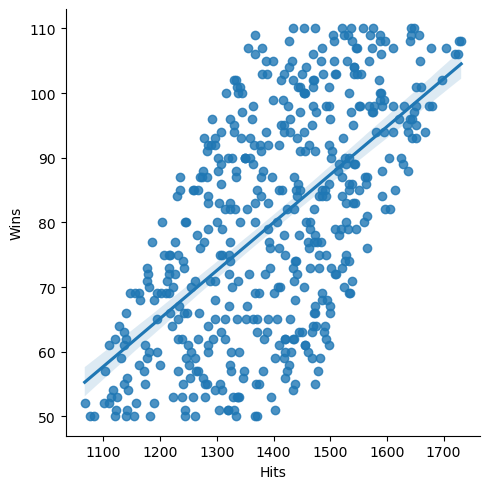

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lmplot(x='Hits', y='Wins', data=df)


/Users/mussa/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


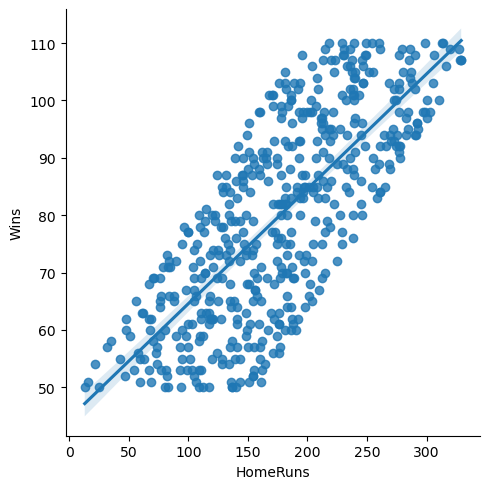

In [32]:
sns.lmplot(x='HomeRuns', y='Wins', data=df)

Drop nominal and useless or redundant data

In [33]:
df2 = df.drop(columns=['Team', 'Season', 'Losses'], axis=1)
df2.head()

,Wins,Hits,Doubles,Triples,HomeRuns,Strikeouts
0,109,1505,394,64,231,869
1,89,1527,255,31,155,1155
2,53,1335,229,-16,54,1425
3,54,1296,262,12,164,1640
4,76,1463,217,33,175,1486


In [34]:
X = df[['Hits', 'Doubles', 'Triples', 'HomeRuns', 'Strikeouts']]
y = df[['Wins']]

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [37]:
lr.score(X_train, y_train)

0.897259734745992

In [38]:
lr.fit(X_test, y_test)
lr.score(X_test, y_test)

0.8712229941913334

In [39]:
y_pred = lr.predict(X_test)

In [40]:
mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)

(5.05005154617772, 36.58579202655321, 0.8712229941913334)

In [41]:
lr.coef_

array([[ 0.01001466,  0.0411605 ,  0.39537502,  0.05358253, -0.0179543 ]])

In [42]:
lr.intercept_

array([56.70856534])